#### Note: Latest May 20 (1.30pm) - OneHot Encoding


## Reading in data and taking a quick look at some charts

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read in csv
df = pd.read_csv("Austin_Animal_Center_Outcomes.csv")

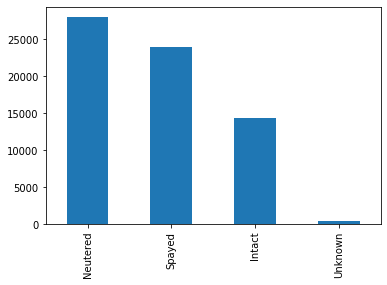

In [3]:
# Take a quick peak at charts

# Top Breeds
# df['Breed'].value_counts().head(20).plot.bar()

# Top Outcome_Types
# df['Breed'].value_counts().head(20).plot.bar()

# Sex split?
# df['Sex'].value_counts().head(20).plot.bar()

# Fixed?
df['Fixed'].value_counts().head(20).plot.bar()

# Age chart
# bins= [0,24,72,120]
# plt.hist(df.Age_month, bins=bins, edgecolor="k")
# plt.xticks(bins)
# plt.show()

In [5]:
df.loc[250:280, :]

,Animal_ID,Name,DateTime,MonthYear,Date_of_Birth,Outcome_Type,Outcome_Subtype,Fixed,Sex,Age_numeric,Age_time,Age_month,Breed,Color
250,A809527,*Cricket,12/11/2019 16:17,12/11/2019 16:17,10/18/2019,Adoption,Foster,Spayed,Female,1,month,1.0,Labrador Retriever Mix,Black/White
251,A797472,NaN,06/13/2019 06:59:00 PM,06/13/2019 06:59:00 PM,04/24/2019,Transfer,Partner,Intact,Female,1,month,1.0,Chihuahua Longhair Mix,Black/Tan
252,A742456,*Arrow,02/14/2017 06:27:00 PM,02/14/2017 06:27:00 PM,12/22/2016,Adoption,Foster,Spayed,Female,1,month,1.0,Pit Bull Mix,Brown/Black
253,A721330,*Glen,3/5/2016 17:40,3/5/2016 17:40,1/9/2016,Adoption,Foster,Neutered,Male,1,month,1.0,German Shepherd Mix,Tan
254,A697339,NaN,02/23/2015 06:36:00 PM,02/23/2015 06:36:00 PM,12/30/2014,Adoption,NaN,Spayed,Female,1,month,1.0,German Shepherd/Pit Bull,Brown
255,A695918,Clementine,01/29/2015 05:59:00 PM,01/29/2015 05:59:00 PM,11/30/2014,Adoption,NaN,Spayed,Female,1,month,1.0,Dachshund/Chihuahua Shorthair,Black/White
256,A809888,NaN,12/4/2019 12:05,12/4/2019 12:05,10/19/2019,Transfer,Partner,Intact,Female,1,month,1.0,Labrador Retriever/German Shepherd,Brown/White
257,A774855,NaN,7/10/2018 19:10,7/10/2018 19:10,05/21/2018,Transfer,Partner,Intact,Male,1,month,1.0,Australian Kelpie Mix,Brown/White
258,A750857,*Cinder,07/28/2017 10:37:00 PM,07/28/2017 10:37:00 PM,6/1/2017,Adoption,Foster,Spayed,Female,1,month,1.0,Great Pyrenees/American Bulldog,Black/White
259,A762939,NaN,11/30/2017 12:00:00 AM,11/30/2017 12:00:00 AM,09/30/2017,Transfer,Partner,Intact,Female,1,month,1.0,Pit Bull Mix,Brown/White


In [6]:
df.shape

(66804, 14)

## Cleaning
1. Drop unnessary columns
2. Drop rows where "Outcome_Type" is null
3. Drop rows where "Outcome_Type" is Return_To_Owner

In [7]:
# Quick check for missing values
df.apply(lambda x: sum(x.isnull()/len(df)))

Animal_ID          0.000000
Name               0.169496
DateTime           0.000000
MonthYear          0.000000
Date_of_Birth      0.000000
Outcome_Type       0.000000
Outcome_Subtype    0.688567
Fixed              0.000015
Sex                0.005673
Age_numeric        0.000000
Age_time           0.000000
Age_month          0.000000
Breed              0.000000
Color              0.000000
dtype: float64

In [8]:
# Drop unnessary columns
df2 = df.drop(columns=['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth', 'Outcome_Subtype', 
                       'Age_numeric', 'Age_time' ])

In [9]:
df2.shape
# df2.head()

(66804, 6)

In [10]:
# Drop rows where Outcome_Type is null

df2 = df2.loc[df2.Outcome_Type.notna(), ["Outcome_Type", "Fixed", "Sex", "Age_month", "Breed" ,"Color"]]

In [11]:
# Check for more nulls
df2.head()
df2.apply(lambda x: sum(x.isnull()/len(df2)))
df2.shape

(66804, 6)

In [12]:
# Have to fix the following columns "Fixed" and "Sex"
df2 = df2.dropna(axis=0, subset=["Fixed", "Sex"])

In [13]:
# Verify that nulls from "Fixed" and "Sex" have been dropped
df2.apply(lambda x: sum(x.isnull()/len(df2)))
df2.shape

(66425, 6)

In [14]:
# df2.groupby('Outcome_Type').count()
df2.groupby('Color').count().sort_values('Outcome_Type', ascending=False)

,Outcome_Type,Fixed,Sex,Age_month,Breed
Color,,,,,
Black/White,7831,7831,7831,7831,7831
Brown/White,3706,3706,3706,3706,3706
Tan/White,3584,3584,3584,3584,3584
Black,3502,3502,3502,3502,3502
White,3464,3464,3464,3464,3464
...,...,...,...,...,...
Cream/Blue,1,1,1,1,1
Chocolate/Yellow,1,1,1,1,1
Chocolate/Red Tick,1,1,1,1,1


In [17]:
# Drop all rows 'Return to Owner' ???  Assuming that chip is checked at intake

df3 = df2.drop(df2[df2.Outcome_Type == "Return to Owner"].index)

In [18]:
# Verify shape
df3.shape

(48025, 6)

In [19]:
# Verify group by counts (Return to Owner should be gone)
df3.groupby('Outcome_Type').count()

,Fixed,Sex,Age_month,Breed,Color
Outcome_Type,,,,,
Adoption,31395,31395,31395,31395,31395
Died,209,209,209,209,209
Disposal,22,22,22,22,22
Euthanasia,1694,1694,1694,1694,1694
Missing,29,29,29,29,29
Rto-Adopt,498,498,498,498,498
Transfer,14178,14178,14178,14178,14178


In [20]:
# Anymore missing values before we move on?  If zero, then we are good.
df3.apply(lambda x: sum(x.isnull()/len(df3)))

Outcome_Type    0.0
Fixed           0.0
Sex             0.0
Age_month       0.0
Breed           0.0
Color           0.0
dtype: float64

## Add new features?
1. New feature? - Mixed/Pure Breed? - COMPLETED!! 
2. Split breeds - COMPLETED!!
3. Color -  We have 333 unique color combinations. Hot encoding "Color" will create additional X features if we didn't do anything.  This would be unlikely to create a good performing model.
    *  Option 1 - We take any values occurring fewer than 300 times and places them into the “other” label. We use this to create a new feature called “Top_colors”.  Doing this would reduce 333 unique colors to 30 unique values - COMPLETED!
    *  Option 2 - Split to primary color vs secondary color? - COMPLETED!
4. Creating age groups - COMPLETED!!
5. Breeds - Hot encoding "Breed" will create additional 1,380 new features if we didn't do anything.  
6. New feature? - Single color/Multi color?

#### Creating a Mix/Pure Breed column
1. Create new MIX column
2. Split breed into breed_primary and breed_second


In [24]:
# How many unique breed combinations before split? - 2010, that's a lot!
# Solution1:  Create MIX column to identify PURE BREED vs MIX BREED
# Solution2:  After cleaning the name (taking MIX out), then split into primary and secondary breed columns  
len(df3.Breed.value_counts())

2010

#### solution1 - Creating a MIX column
* 1 value is Mixed
* 0 value is Pure

In [25]:
# Make a copy and add new column called Mix, set to 0
df4 = df3.copy()
df4["Mix"]=0
df4.head()

,Outcome_Type,Fixed,Sex,Age_month,Breed,Color,Mix
0,Adoption,Spayed,Female,1.000000,Border Collie Mix,Chocolate/White,0
1,Transfer,Intact,Male,0.066667,German Shepherd Mix,Brown,0
2,Transfer,Intact,Male,0.066667,Labrador Retriever Mix,Black/White,0
4,Transfer,Intact,Female,0.066667,Dachshund Mix,Brown,0
6,Transfer,Intact,Female,0.066667,Pit Bull Mix,Chocolate/White,0


In [26]:
df4.loc[200:210, :]

,Outcome_Type,Fixed,Sex,Age_month,Breed,Color,Mix
200,Transfer,Intact,Female,0.2,Dachshund,Tan,0
201,Transfer,Intact,Male,0.2,Dachshund,Tan,0
205,Transfer,Intact,Female,0.2,German Shepherd/Rottweiler,Brown/Black,0
206,Transfer,Intact,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,0
208,Transfer,Intact,Female,0.2,Rat Terrier Mix,White,0
209,Transfer,Intact,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,0
210,Transfer,Intact,Male,0.2,Rat Terrier Mix,White,0


In [27]:
# Find rows containing word "Mix" and set to 1 (for True)
df4.loc[df4["Breed"].str.contains("Mix"), "Mix"] = 1

In [28]:
# Verify - any row with the word "Mix" in Breed column should be a 1 in the new Mix column
df4.loc[200:210, :]

,Outcome_Type,Fixed,Sex,Age_month,Breed,Color,Mix
200,Transfer,Intact,Female,0.2,Dachshund,Tan,0
201,Transfer,Intact,Male,0.2,Dachshund,Tan,0
205,Transfer,Intact,Female,0.2,German Shepherd/Rottweiler,Brown/Black,0
206,Transfer,Intact,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,0
208,Transfer,Intact,Female,0.2,Rat Terrier Mix,White,1
209,Transfer,Intact,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,0
210,Transfer,Intact,Male,0.2,Rat Terrier Mix,White,1


In [29]:
# Rename the breed WITHOUT the word MIX
df4.loc[df4['Breed'].str.contains('Mix'), 'Breed'] = df4.loc[df4['Breed'].str.contains('Mix'), 'Breed'].str.replace(' Mix', '')

In [30]:
# Verify that the word 'Mix' is no longer part of the description if Mix is equal to 1
df4.loc[200:210, :]

,Outcome_Type,Fixed,Sex,Age_month,Breed,Color,Mix
200,Transfer,Intact,Female,0.2,Dachshund,Tan,0
201,Transfer,Intact,Male,0.2,Dachshund,Tan,0
205,Transfer,Intact,Female,0.2,German Shepherd/Rottweiler,Brown/Black,0
206,Transfer,Intact,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,0
208,Transfer,Intact,Female,0.2,Rat Terrier,White,1
209,Transfer,Intact,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,0
210,Transfer,Intact,Male,0.2,Rat Terrier,White,1


#### Solution2 - Split breed column into primary and secondary!  

In [31]:
df4[['Breed_primary','Breed_second']] = df4.Breed.str.split("/", n=1, expand=True) 

In [32]:
df4.head()
df4.loc[200:230, :]

,Outcome_Type,Fixed,Sex,Age_month,Breed,Color,Mix,Breed_primary,Breed_second
200,Transfer,Intact,Female,0.2,Dachshund,Tan,0,Dachshund,None
201,Transfer,Intact,Male,0.2,Dachshund,Tan,0,Dachshund,None
205,Transfer,Intact,Female,0.2,German Shepherd/Rottweiler,Brown/Black,0,German Shepherd,Rottweiler
206,Transfer,Intact,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,0,Labrador Retriever,Pit Bull
208,Transfer,Intact,Female,0.2,Rat Terrier,White,1,Rat Terrier,None
209,Transfer,Intact,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,0,Labrador Retriever,Pit Bull
210,Transfer,Intact,Male,0.2,Rat Terrier,White,1,Rat Terrier,None
213,Transfer,Intact,Male,0.2,Dachshund,Tan,0,Dachshund,None
215,Transfer,Intact,Female,0.2,Dachshund,Tan,0,Dachshund,None
216,Transfer,Intact,Female,0.2,Dachshund,Tan,0,Dachshund,None


In [33]:
# How many unique breed combinations before split?
# Breed column - 1854

# How many unique breed combinations AFTER split?
# Breed_primary - 198
# Breed_primary - 162

len(df4.Breed_second.value_counts())

162

In [36]:
breed_top10primary = [x for x in df4.Breed_primary.value_counts().sort_values(ascending=False).head(15).index]
breed_top10primary

df4.Breed_primary.value_counts().sort_values(ascending=False).head(10)

Labrador Retriever       7021
Pit Bull                 6455
Chihuahua Shorthair      5997
German Shepherd          3113
Australian Cattle Dog    1676
Dachshund                1327
Border Collie            1019
Boxer                     998
Miniature Poodle          746
Catahoula                 699
Name: Breed_primary, dtype: int64

In [37]:
breed_top10second = [x for x in df4.Breed_second.value_counts().sort_values(ascending=False).tail(10).index]
breed_top10second

df4.Breed_second.value_counts().sort_values(ascending=False).head(10)

Labrador Retriever       1147
Chihuahua Shorthair       691
Pit Bull                  544
German Shepherd           471
Dachshund                 461
Australian Cattle Dog     369
Beagle                    299
Border Collie             262
Miniature Poodle          256
Boxer                     235
Name: Breed_second, dtype: int64

# QUESTION!  Should you not use breed_second?

#### Handling Color - Option 1 (Selecting Top_Colors) - DID NOT DO HERE.  CODE IS COMMENTED OUT!
* How does option1 effect RF/LogReg models?


In [38]:
# How many unique color combinations?  - 333
color_counts = df4['Color'].value_counts()
len(color_counts)
# print(df3['Color'].nunique())

# # Handling "Color" Option 1
# color_others = set(color_counts[color_counts < 300].index)
# df4['Top_colors'] = df4['Color'].replace(list(color_others), 'Others')
# print(df4['Top_colors'].nunique())

333

In [39]:
# Drop Color column?
df4.loc[150:160, :]

,Outcome_Type,Fixed,Sex,Age_month,Breed,Color,Mix,Breed_primary,Breed_second
150,Transfer,Intact,Male,0.166667,Chihuahua Shorthair,Black/White,1,Chihuahua Shorthair,None
151,Transfer,Intact,Female,0.166667,American Bulldog,White,1,American Bulldog,None
152,Transfer,Intact,Female,0.166667,Chihuahua Shorthair,Fawn/Black,1,Chihuahua Shorthair,None
153,Transfer,Intact,Male,0.166667,Chihuahua Shorthair,Brown/White,1,Chihuahua Shorthair,None
154,Transfer,Intact,Female,0.166667,Chihuahua Shorthair,Black/White,1,Chihuahua Shorthair,None
155,Died,Intact,Male,0.166667,Chihuahua Shorthair,Brown,1,Chihuahua Shorthair,None
156,Transfer,Intact,Female,0.166667,Miniature Poodle,White,1,Miniature Poodle,None
157,Transfer,Intact,Female,0.166667,Pit Bull,White/Black,1,Pit Bull,None
158,Transfer,Intact,Female,0.166667,Chihuahua Shorthair,Tricolor,1,Chihuahua Shorthair,None
159,Transfer,Intact,Female,0.166667,Pit Bull,Sable/White,1,Pit Bull,None


#### Handling Color - Option 2 (Split and have intaker check all colors that apply)
* How does option2 effect RF/LogReg models?

In [40]:
# Split Top_color column into color1, color2
df4[['Color1','Color2']] = df4.Color.str.split("/", n=1, expand=True) 

In [41]:
df4.loc[150:160, :]

,Outcome_Type,Fixed,Sex,Age_month,Breed,Color,Mix,Breed_primary,Breed_second,Color1,Color2
150,Transfer,Intact,Male,0.166667,Chihuahua Shorthair,Black/White,1,Chihuahua Shorthair,None,Black,White
151,Transfer,Intact,Female,0.166667,American Bulldog,White,1,American Bulldog,None,White,None
152,Transfer,Intact,Female,0.166667,Chihuahua Shorthair,Fawn/Black,1,Chihuahua Shorthair,None,Fawn,Black
153,Transfer,Intact,Male,0.166667,Chihuahua Shorthair,Brown/White,1,Chihuahua Shorthair,None,Brown,White
154,Transfer,Intact,Female,0.166667,Chihuahua Shorthair,Black/White,1,Chihuahua Shorthair,None,Black,White
155,Died,Intact,Male,0.166667,Chihuahua Shorthair,Brown,1,Chihuahua Shorthair,None,Brown,None
156,Transfer,Intact,Female,0.166667,Miniature Poodle,White,1,Miniature Poodle,None,White,None
157,Transfer,Intact,Female,0.166667,Pit Bull,White/Black,1,Pit Bull,None,White,Black
158,Transfer,Intact,Female,0.166667,Chihuahua Shorthair,Tricolor,1,Chihuahua Shorthair,None,Tricolor,None
159,Transfer,Intact,Female,0.166667,Pit Bull,Sable/White,1,Pit Bull,None,Sable,White


In [42]:
# How many unique colors? - 333 unique color combinations
# df4.Color.value_counts().sort_values(ascending=False).head(20)
# len(df4.Color.value_counts())

# # How many unique colors in COLOR1? - 37
# len(df4.Color1.value_counts())

# How many unique colors in COLOR2? - 34
len(df4.Color2.value_counts())

34

In [45]:
color_top10Color1 = [x for x in df4.Color1.value_counts().sort_values(ascending=False).head(30).index]
color_top10Color1

df4.Color1.value_counts().sort_values(ascending=False).head(40)

Black             12758
White              8395
Brown              6285
Tan                6025
Brown Brindle      2242
Tricolor           2155
Red                2067
Blue               1685
Chocolate          1192
Cream               753
Sable               729
Fawn                601
Gray                504
Yellow              494
Buff                470
Blue Merle          342
Black Brindle       275
Brown Merle         177
Blue Tick           177
Gold                150
Red Tick            131
Red Merle            87
Silver               77
Yellow Brindle       73
Apricot              65
Blue Tiger           31
Liver                24
Brown Tiger          20
Black Smoke          18
Blue Cream            5
Liver Tick            5
Orange                4
Black Tiger           2
Agouti                2
Blue Smoke            2
Calico                2
Ruddy                 1
Name: Color1, dtype: int64

In [46]:
color_top10Color2 = [x for x in df4.Color2.value_counts().sort_values(ascending=False).head(10).index]
color_top10Color2

df4.Color2.value_counts().sort_values(ascending=False).head(40)

White             17434
Black              4311
Tan                4063
Brown              3526
Tricolor            701
Brown Brindle       480
Gray                324
Red                 254
Cream               249
Blue                191
Chocolate           116
Buff                 97
Silver               57
Fawn                 47
Blue Tick            47
Red Tick             40
Blue Merle           40
Black Brindle        37
Red Merle            29
Yellow               29
Brown Merle          23
Orange               22
Liver                16
Gold                 11
Yellow Brindle        8
Blue Cream            6
Apricot               5
Pink                  4
Liver Tick            3
Black Smoke           3
Brown Tiger           2
Blue Tiger            2
Tortie                1
Black Tiger           1
Name: Color2, dtype: int64

# QUESTION!  Should you simplify the color intake?  

#### Creating age categories
* Baby: <=6months
* Young: 7months-24 months
* Adult: 2 years-7years
* Senior: 7+

In [43]:
df4['Pet_age_category'] = pd.cut(x=df4['Age_month'], bins=[0, 6, 24, 84,240], labels=['Baby', 'Young', 'Adult', 'Senior'])

In [44]:
df4.loc[50000:50020, :]
df4.tail()

,Outcome_Type,Fixed,Sex,Age_month,Breed,Color,Mix,Breed_primary,Breed_second,Color1,Color2,Pet_age_category
66772,Euthanasia,Intact,Male,216.0,Miniature Schnauzer,Gray,1,Miniature Schnauzer,None,Gray,None,Senior
66774,Adoption,Neutered,Male,216.0,Chihuahua Longhair,White/Tan,1,Chihuahua Longhair,None,White,Tan,Senior
66786,Euthanasia,Spayed,Female,228.0,Miniature Poodle,White,0,Miniature Poodle,None,White,None,Senior
66787,Transfer,Neutered,Male,228.0,Chihuahua Shorthair,Brown,1,Chihuahua Shorthair,None,Brown,None,Senior
66790,Euthanasia,Spayed,Female,228.0,Chihuahua Longhair/Miniature Poodle,White,0,Chihuahua Longhair,Miniature Poodle,White,None,Senior


In [47]:
# What's the breakdown by Pet_age_category after binning??
df4.Pet_age_category.value_counts().sort_values(ascending=False).head(10)

Young     22342
Baby      13355
Adult      9249
Senior     3077
Name: Pet_age_category, dtype: int64

## Changing to Binary Outcome - Take the dog or Don't take the dog?
* Positive Outcome is Adoption - Take in the dog
* Negative Outcome is a combination of Transfer, Euthanized and Death categories - Don't take in the dog

In [49]:
# Create new BINARY_OUTCOME column and set to 0

df4["Binary_outcome"]=0
df4.head()

,Outcome_Type,Fixed,Sex,Age_month,Breed,Color,Mix,Breed_primary,Breed_second,Color1,Color2,Pet_age_category,Binary_outcome
0,Adoption,Spayed,Female,1.000000,Border Collie,Chocolate/White,1,Border Collie,None,Chocolate,White,Baby,0
1,Transfer,Intact,Male,0.066667,German Shepherd,Brown,1,German Shepherd,None,Brown,None,Baby,0
2,Transfer,Intact,Male,0.066667,Labrador Retriever,Black/White,1,Labrador Retriever,None,Black,White,Baby,0
4,Transfer,Intact,Female,0.066667,Dachshund,Brown,1,Dachshund,None,Brown,None,Baby,0
6,Transfer,Intact,Female,0.066667,Pit Bull,Chocolate/White,1,Pit Bull,None,Chocolate,White,Baby,0


In [50]:
# Find rows containing word "Adoption" and set to 1 (for Positive Outcome)
# All other rows will be 0 (for Negative Outcome)

df4.loc[df4["Outcome_Type"].str.contains("Adoption"), "Binary_outcome"] = 1

In [51]:
df4.loc[200:300, :]

,Outcome_Type,Fixed,Sex,Age_month,Breed,Color,Mix,Breed_primary,Breed_second,Color1,Color2,Pet_age_category,Binary_outcome
200,Transfer,Intact,Female,0.2,Dachshund,Tan,0,Dachshund,None,Tan,None,Baby,0
201,Transfer,Intact,Male,0.2,Dachshund,Tan,0,Dachshund,None,Tan,None,Baby,0
205,Transfer,Intact,Female,0.2,German Shepherd/Rottweiler,Brown/Black,0,German Shepherd,Rottweiler,Brown,Black,Baby,0
206,Transfer,Intact,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,0,Labrador Retriever,Pit Bull,Brown Brindle,None,Baby,0
208,Transfer,Intact,Female,0.2,Rat Terrier,White,1,Rat Terrier,None,White,None,Baby,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Transfer,Intact,Female,1.0,German Shepherd,Brown,1,German Shepherd,None,Brown,None,Baby,0
297,Transfer,Intact,Male,1.0,Australian Cattle Dog,Cream/Brown Merle,1,Australian Cattle Dog,None,Cream,Brown Merle,Baby,0
298,Adoption,Spayed,Female,1.0,Labrador Retriever,Tan,1,Labrador Retriever,None,Tan,None,Baby,1
299,Transfer,Intact,Male,1.0,Jack Russell Terrier,Sable,1,Jack Russell Terrier,None,Sable,None,Baby,0


## OneHotEncode (instead of get_dummies)

In [52]:
df4.head()

,Outcome_Type,Fixed,Sex,Age_month,Breed,Color,Mix,Breed_primary,Breed_second,Color1,Color2,Pet_age_category,Binary_outcome
0,Adoption,Spayed,Female,1.000000,Border Collie,Chocolate/White,1,Border Collie,None,Chocolate,White,Baby,1
1,Transfer,Intact,Male,0.066667,German Shepherd,Brown,1,German Shepherd,None,Brown,None,Baby,0
2,Transfer,Intact,Male,0.066667,Labrador Retriever,Black/White,1,Labrador Retriever,None,Black,White,Baby,0
4,Transfer,Intact,Female,0.066667,Dachshund,Brown,1,Dachshund,None,Brown,None,Baby,0
6,Transfer,Intact,Female,0.066667,Pit Bull,Chocolate/White,1,Pit Bull,None,Chocolate,White,Baby,0


In [53]:
# Drop these columns:
# Outcome_Type column since we now have Binary_outcome 
# Age_month since we have Pet_age_category
# Breed since we have Breed_primary, Breed_second     - SHOULD BE DROP BREED_SECOND??
# Color since we have Color1, Color2
df5 = df4.drop(columns=['Outcome_Type','Age_month', 'Breed', 'Color' ])

In [ ]:
# Define X and y
X = df4.drop(['Outcome_Type', 'Binary_outcome','Breed', 'Color', 'Top_colors', 'Age_month'], axis="columns")
y = df4[['Binary_outcome']]

In [ ]:
X.shape

In [ ]:
y.shape

## Random Forest model


In [ ]:
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Import, initialize, fit and predict
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 10) 
rf_model.fit(X_train, y_train)
predict_y_test = rf_model.predict(X_test)

In [ ]:
# Validate - run accuracy score
from sklearn import metrics
print("Accuracy score: ", metrics.accuracy_score(y_test, predict_y_test))

In [ ]:
# RF Feature importance?
feature_list = list(X.columns)
feature_importance = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False) 
print(feature_importance[0:10])

In [ ]:
# Validate with cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=10, scoring="accuracy")
print(scores)

In [ ]:
scores.mean()

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

In [ ]:
print(f"Training Data Score: {logReg.score(X_train, y_train)}")
print(f"Testing Data Score: {logReg.score(X_test, y_test)}")